In [42]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import association_metrics as am
import matplotlib.pyplot as plt

In [107]:
#read all the datasets
df_k80_50k = pd.read_csv("./data/simple.k80.s221.50k.csv.gz", compression='gzip', header=None, sep=' ')
df_k160_100k_f74 = pd.read_csv("./data/simple.k160.s221.100k.f74.csv.gz", compression='gzip', header=None, sep=' ')
df_k160_100k_f75 = pd.read_csv("./data/simple.k160.s221.100k.f75.csv.gz", compression='gzip', header=None, sep=' ')
df_k160_100k_f76 = pd.read_csv("./data/simple.k160.s221.100k.f76.csv.gz", compression='gzip', header=None, sep=' ')
df_k160_500k_f75 = pd.read_csv("./data/simple.k160.s221.500k.f75.csv.gz", compression='gzip', header=None, sep=' ')

In [111]:
#convert to categorical
df_k80_50k = df_k80_50k.astype('category')
df_k160_100k_f74 = df_k160_100k_f74.astype('category')
df_k160_100k_f75 = df_k160_100k_f75.astype('category')
df_k160_100k_f76 = df_k160_100k_f76.astype('category')
df_k160_500k_f75 = df_k160_500k_f75.astype('category')

In [115]:
datasets_dict = {
    'k80_50k': df_k80_50k,
    'k160_100k_f74': df_k160_100k_f74,
    'k160_100k_f75': df_k160_100k_f75,
    'k160_100k_f76': df_k160_100k_f76,
    'k160_500k_f75': df_k160_500k_f75
}

In [139]:
#correlations for all the datasets
corr_dict = {}
for dataset_name, dataset in datasets_dict.items():
    cramersv = am.CramersV(dataset)
    corr_matrix = cramersv.fit()
    corr_dict[dataset_name] = corr_matrix.iloc[-1]

In [140]:
#convert to dataframe
corr_df = pd.DataFrame(corr_dict)

In [142]:
corr_df = corr_df.iloc[:-1,:]

In [137]:
corr_df.head()

,k80_50k,k160_100k_f74,k160_100k_f75,k160_100k_f76,k160_500k_f75
0,0.002551,0.011159,0.003984,0.000392,0.002377
1,0.009416,0.030873,0.030442,0.005183,0.002277
2,0.001399,0.017094,0.024274,0.012408,0.007435
3,0.007041,0.005138,0.000413,0.004338,0.001941
4,0.006923,0.003613,0.018553,0.004296,0.002808


In [155]:
#from each column find the max 20 correlations and their indices, and store them in a dictionary
corr_dict_indv = {}
for col in corr_df.columns:
    corr_dict_indv[col] = corr_df[col].nlargest(20)#.to_dict()

In [158]:
#dataframes
dataframes = []
for dataset_name, dataset in corr_dict_indv.items():
    df = pd.DataFrame(dataset)
    dataframes.append(df)

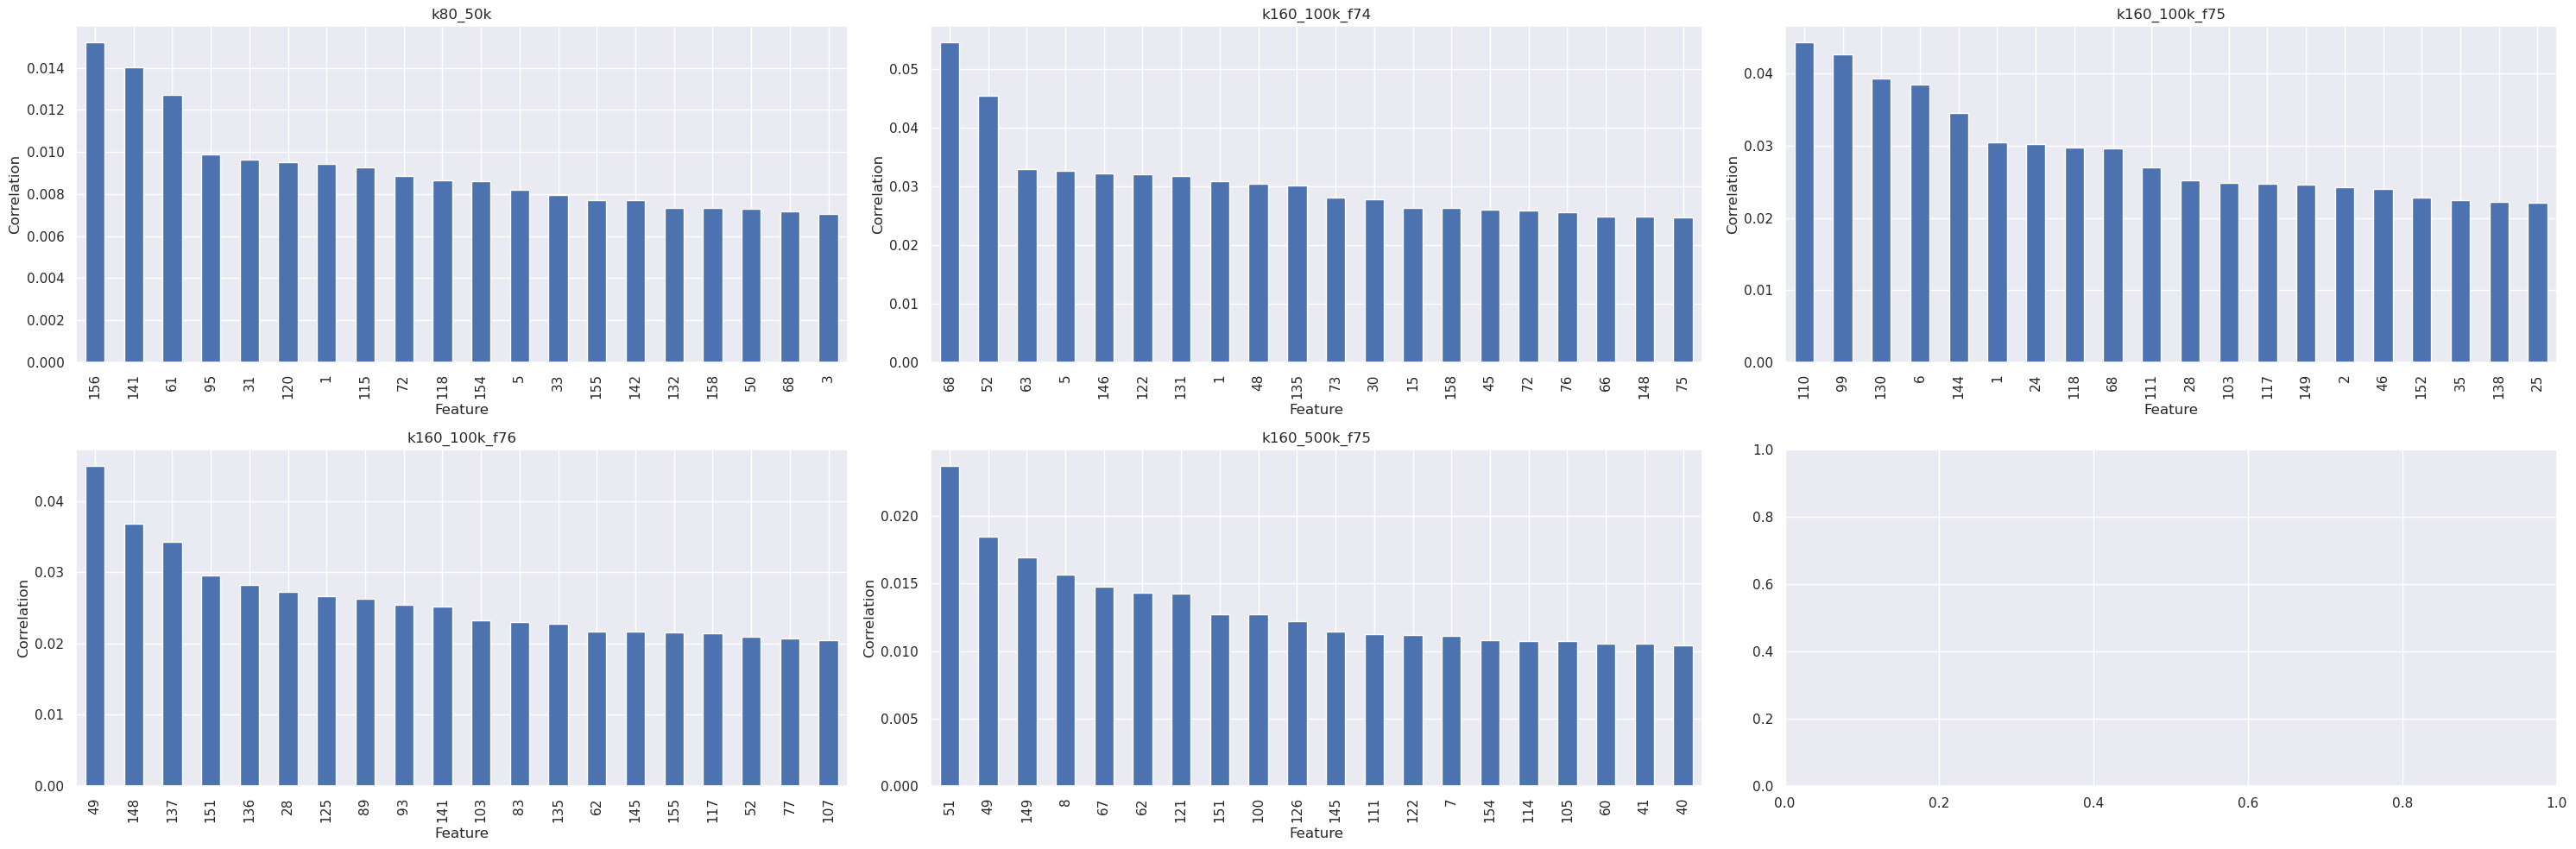

In [167]:
#subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 10))
axes = axes.flatten()
for ax, df in zip(axes.flatten(), dataframes):
    df.plot.bar(ax=ax, legend=False)
    ax.set_title(df.columns[0])
    ax.set_xlabel('Feature')
    ax.set_ylabel('Correlation')
plt.tight_layout()
plt.show()

#### Feaure numbers are the name of the columns represented in X and Y axis representing the correlation between the features and the target variable. I used Cramér's V method to calculate the correlation between the features and the target variable. This method is used to calculate the correlation between categorical variables.

In [2]:
# def CrammersV(dfs: list):
#     #correlations for all the datasets
#     result_dfs = []
#     for dataset in dfs:
#         #convert to categorical
#         dataset = dataset.astype('category')
#         cramersv = am.CramersV(dataset)
#         corr_matrix = cramersv.fit()
#         indices = corr_matrix.iloc[:, -1].nlargest(20).index.values
#         result_dfs.append(dataset[:, indices])
#     return result_dfs

In [8]:
simple_k67 = pd.read_csv("./data/simple.k67.s112.100k.f83.csv.gz", compression='gzip', header=None, sep=' ')
prefix_k67 = pd.read_csv("./data/prefix.k67.s112.1500k.f73.csv.gz", compression='gzip', header=None, sep=' ')
prefix_k67_f66 = pd.read_csv("./data/prefix.k67.s112.1500k.f66.csv.gz", compression='gzip', header=None, sep=' ')

In [9]:
prefix_k67_f66

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0,1,1,0,1,0,0,0,1,1,...,0,0,1,1,0,0,1,1,0,1
1,1,0,0,0,0,1,0,1,1,1,...,0,0,1,1,0,0,1,1,0,1
2,1,0,0,1,0,0,0,0,0,1,...,1,0,1,1,0,0,1,1,0,0
3,0,0,1,0,1,1,1,0,0,1,...,0,0,1,1,0,0,1,1,0,0
4,0,1,1,0,1,1,1,0,1,1,...,1,0,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,1,1,1,1,0,1,1,1,1,1,...,1,0,1,1,0,0,1,1,0,1
5855,1,0,1,0,1,0,1,1,1,0,...,1,0,1,1,0,0,1,1,0,0
5856,0,1,0,1,1,0,0,0,0,1,...,0,0,1,1,0,0,1,1,0,0
5857,0,1,0,1,1,0,1,1,1,1,...,1,0,1,1,0,0,1,1,0,0


In [10]:
#convert to categorical
simple_k67 = simple_k67.astype('category')
prefix_k67 = prefix_k67.astype('category')
prefix_k67_f66 = prefix_k67_f66.astype('category')

In [12]:
# #correlation simple_k67
# cramersv_simple_k67 = am.CramersV(simple_k67)
# corr_matrix_simple_k67 = cramersv_simple_k67.fit()
# indices_simple_k67 = corr_matrix_simple_k67.iloc[:, -1].nlargest(20).index.values

In [13]:
#correlation prefix_k67_f66
cramersv_prefix_k67_f66 = am.CramersV(prefix_k67_f66)
corr_matrix_prefix_k67_f66 = cramersv_prefix_k67_f66.fit()

ValueError: 0 and 152 must have at least 2 different levels

In [106]:
#select the features from the indices
simple_k67_selected = simple_k67.iloc[:, indices_simple_k67]
prefix_k67_selected = prefix_k67.iloc[:, indices_prefix_k67]

In [107]:
simple_k67_selected.head(2)

,160,76,52,50,131,22,83,157,96,40,44,84,57,9,119,21,82,145,0,7
0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0
1,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1


In [108]:
#take col 160 to the end
target_simple_k67 = simple_k67_selected[160]
target_prefix_k67 = prefix_k67_selected[160]
#drop the target column
simple_k67_selected = simple_k67_selected.drop(160, axis=1)
prefix_k67_selected = prefix_k67_selected.drop(160, axis=1)
#add the target column to the end
simple_k67_selected[160] = target_simple_k67
prefix_k67_selected[160] = target_prefix_k67

In [109]:
#convert to numbers
simple_k67_selected = simple_k67_selected.apply(lambda x: x.cat.codes)
prefix_k67_selected = prefix_k67_selected.apply(lambda x: x.cat.codes)

In [130]:
simple_k67_selected.to_csv("./data/simple.k67.s112.100k.f83_selected.csv.gz", compression='gzip', header=None, index=None, sep=' ')
prefix_k67_selected.to_csv("./data/prefix.k67.s112.1500k.f73_selected.csv.gz", compression='gzip', header=None, index=None, sep=' ')

In [131]:
#shapes
simple_k67_selected.shape, prefix_k67_selected.shape

((5663, 20), (5770, 20))

In [112]:
prefix_k67_selected.head()

,76,52,50,131,22,83,157,96,40,44,84,57,9,119,21,82,145,0,7,160
0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0
1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0
2,1,0,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1
3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,1,0,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,0,0


<AxesSubplot:>

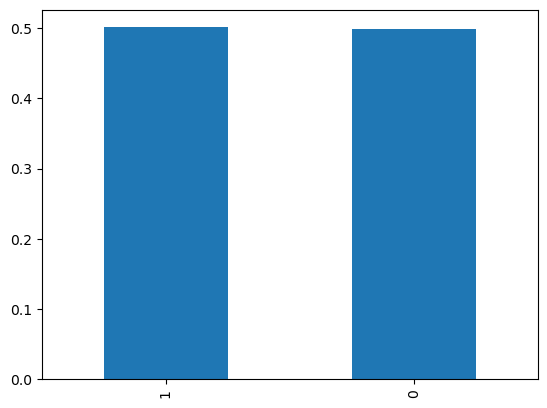

In [113]:
#find class ratios for simple_k67
simple_k67_selected[160].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

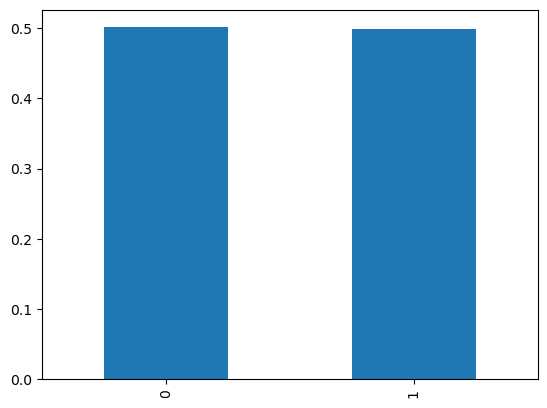

In [114]:
#find class ratios for prefix_k67 
prefix_k67_selected[160].value_counts(normalize=True).plot.bar()

In [88]:
import pandas as pd

In [89]:
path = "/home/pops/myProjects/Up/TabSurvey/Sample Code/prefix.k67.s112.1500k.f66.csv.gz"

In [90]:
#don't read header
df = pd.read_csv(path, compression='gzip', header= None, sep=' ')

In [91]:
#convert to categorical
df = df.astype('category')

In [92]:
#drop columns 152 to 159
df = df.drop(df.columns[152:160], axis=1)

In [93]:
df_corr = am.CramersV(df).fit()

In [105]:
#select the features from the indices
indices = df_corr.iloc[:, -1].nlargest(10).index.values
df_selected = df[indices]

In [106]:
#take col 160 to the end
target = df_selected[160]
#drop the target column
df_selected = df_selected.drop(160, axis=1)
#add the target column to the end
df_selected[160] = target

In [107]:
#convert to numbers
df_selected = df_selected.apply(lambda x: x.cat.codes)

In [108]:
#export to csv
df_selected.to_csv("./data/prefix.k67.s112.1500k.f66_selected_10.csv.gz", compression='gzip', header=None, index=None, sep=' ')

In [109]:
df_selected.shape

(5859, 10)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/pops/myProjects/Up/TabSurvey/data/range.k67.s112.1500k.f83.f2_38.csv.gz', compression='gzip', header=None, sep=' ')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,1,0,0,0,1,1,0,1,0,0,...,1,0,1,1,1,0,0,1,1,0
1,1,0,0,1,0,1,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0,1,0,0,1,1,1,1,0,0,...,1,0,0,1,1,0,0,1,1,1
3,0,1,1,1,0,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,1,0,1,0,1,1,0,0,...,1,1,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5836,0,0,1,0,0,1,1,0,1,0,...,1,0,0,0,1,1,1,1,0,1
5837,1,0,1,0,1,0,1,0,0,1,...,0,0,1,1,1,0,1,1,0,1
5838,1,1,0,0,0,1,0,0,0,1,...,1,0,0,1,1,1,1,1,1,1
5839,1,0,1,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,1,0,0


In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('data/prefix.k67.s112.1500k.f[0, 20, 40, 60, 80, 100, 120, 140].csv.gz', compression='gzip', header=None, sep=' ')

In [5]:
df2 = pd.read_csv('data/range.k67.s112.1500k.f47.f2_52.csv.gz', compression='gzip', header=None, sep=' ')

In [8]:
df2

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0,1,1,1,0,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
1,0,1,1,0,0,0,0,1,1,0,...,1,1,0,1,0,1,1,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,1
3,1,0,0,0,1,0,1,0,1,0,...,1,0,1,1,1,0,1,0,1,0
4,0,0,1,0,0,0,0,1,1,0,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,0,1,0,0,0,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
6576,1,0,0,1,1,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
6577,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0,1
6578,0,0,0,0,1,1,1,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [1]:
import pandas as pd

In [2]:
path = '/home/pops/myProjects/Up/TabSurvey/data/fwht.k160.s112.50k.csv.gz'

In [4]:
df_fwht = pd.read_csv(path, compression='gzip', header=None, sep=' ')
print(df_fwht.shape)
df_fwht.head()

(50000, 257)


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,75,3,-1,-1,-1,-1,3,3,-1,7,...,-5,-5,-5,7,-1,-1,7,3,-5,0
1,74,-8,-2,0,-4,2,0,2,0,-6,...,-2,0,-2,4,-2,-2,4,2,-4,0
2,85,-7,11,-1,-11,-3,-5,3,3,-5,...,1,1,9,-5,3,1,-3,11,7,1
3,87,-3,3,-3,-1,1,7,5,5,-5,...,5,-7,3,-7,15,-11,3,-7,-5,0
4,91,-3,11,-7,3,-7,-9,9,1,11,...,1,-7,3,-3,11,1,-1,-15,3,0
